# Explorative Daten-Analyse (EDA)
## 1) Daten laden

In [1]:
# Bibliotheken laden
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display_html
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Dateien von Google Drive bereitstellen
from google.colab import drive
drive.mount('/content/drive')

# Excel auslesen
Datensatz = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Model Engineering/PSP_Jan_Feb_2019.xlsx',header = 0)
Datensatz = Datensatz.rename(columns = {"Unnamed: 0":"id"})

Mounted at /content/drive


### Deskriptive statistiken

In [ ]:
# Descriptive statistics
Datensatz.describe()

,id,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000,50410.000000
mean,25204.500000,202.395715,0.202896,0.238266
std,14552.257872,96.274730,0.402160,0.426027
min,0.000000,6.000000,0.000000,0.000000
25%,12602.250000,133.000000,0.000000,0.000000
50%,25204.500000,201.000000,0.000000,0.000000
75%,37806.750000,269.000000,0.000000,0.000000
max,50409.000000,630.000000,1.000000,1.000000


## 1) Beurteilung Datenqualität
### 1.1 Felder und Datentypen

In [ ]:
# Datenformate überprüfen
print(Datensatz.dtypes)

id                     int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


### 1.2 Qualitäts-Check der Datumswerte in Feld "tmsp"

In [ ]:
# Qualitätscheck Feld "tmsp"
#Ermittle Anzahl Transaktionen pro Tag
Daten_gruppiert_tmp = Datensatz.groupby([Datensatz['tmsp'].dt.strftime('%d.%m.%y'),'PSP'])['id'].count()
Daten_gruppiert = pd.DataFrame(Daten_gruppiert_tmp)

Daten_gruppiert['Datum'] = Daten_gruppiert.index.get_level_values('tmsp')
Daten_gruppiert['PSP'] = Daten_gruppiert.index.get_level_values('PSP')
Daten_gruppiert['Datum'] = pd.to_datetime(Daten_gruppiert['Datum'], format='%d.%m.%y')
Daten_gruppiert['Wochentag'] = Daten_gruppiert['Datum'].dt.day_name()
Daten_gruppiert = Daten_gruppiert.rename(columns={'id':'Anzahl Transaktionen'})
Daten_gruppiert.sort_values(by='Datum', inplace=True)

# Liniendiagramm nach Tagesdatum erstellen
fig1 = px.line(Daten_gruppiert, x='Datum', y="Anzahl Transaktionen",color='PSP')
fig1.show()

#Kontrolle, Min- / Max-Datum
print('Min-Datum: ',Datensatz['tmsp'].min())
print('Max-Datum: ',Datensatz['tmsp'].max())

#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['tmsp'].isnull().sum())

Min-Datum:  2019-01-01 00:01:11
Max-Datum:  2019-02-28 23:48:19
Anzahl Datenzeilen mit leeren Werten  0


### 1.3 Qualitätscheck im Feld "country"

In [ ]:
# Qualitätscheck im Feld "country"
Expected_Category = 'Germany'+ '|'+ 'Switzerland' +'|' + 'Austria'
print("Expected_Category are : ", Expected_Category)
if(sum(~Datensatz['country'].str.contains(Expected_Category, na =False))==0):
    display_html(f"<h3><br/>✅ Keine Kategorie außer 'Germany', 'Switzerland', etc.", raw=True)
else:
    display_html(f"<h3><br/>❌ Nachfolgende Zeilen enthalten nicht die erwarteten Kategorien", raw=True)
    display(Datensatz[~Datensatz['country'].str.contains(Expected_Category, na =False)][['country']])

Daten_tmp = Datensatz.groupby('country')['country'].count()
fig = px.pie(Daten_tmp, values='country', names=Daten_tmp.index.values,title='Anzahl Transaktionen nach country')
fig.show()

#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['country'].isnull().sum())

Expected_Category are :  Germany|Switzerland|Austria


✅ Keine Kategorie außer 'Germany', 'Switzerland', etc.

Anzahl Datenzeilen mit leeren Werten  0


### 1.4 Qualitätscheck für das Feld "amount"

In [ ]:
# Qualitätscheck für das Feld "amount"
#Histogram
fig = px.histogram(Datensatz, x="amount",color='PSP')
fig.show()

#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['amount'].isnull().sum())

Anzahl Datenzeilen mit leeren Werten  0


### 1.5 Qualitätscheck Feld "success"

In [ ]:
#Qualitätscheck Feld "success"
Daten1 = Datensatz.groupby('success')['success'].count()
fig = px.pie(Daten1, values='success', names=Daten1.index.values,title='Anzahl Transaktionen nach "success"')
fig.show()
#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['success'].isnull().sum())

Anzahl Datenzeilen mit leeren Werten  0


### 1.6 Qualitätscheck im Feld "PSP"

In [ ]:
# Qualitätscheck im Feld "PSP"
Expected_Category = 'UK_Card'+ '|'+ 'Simplecard' +'|' + 'Moneycard'+ '|'+  'Goldcard'
print("Expected_Category are : ", Expected_Category)
if(sum(~Datensatz['PSP'].str.contains(Expected_Category, na =False))==0):
    display_html(f"<h3><br/>✅ Keine Kategorie außer 'UK_Card', 'Simplecard', etc.", raw=True)
else:
    display_html(f"<h3><br/>❌ Nachfolgende Zeilen enthalten nicht die erwarteten Kategorien", raw=True)
    display(Datensatz[~Datensatz['PSP'].str.contains(Expected_Category, na =False)][['PSP']])

Daten2 = Datensatz.groupby('PSP')['PSP'].count()
fig = px.pie(Daten2, values='PSP', names=Daten2.index.values,title='Anzahl Transaktionen nach "PSP"')
fig.show()
#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['PSP'].isnull().sum())

Expected_Category are :  UK_Card|Simplecard|Moneycard|Goldcard


✅ Keine Kategorie außer 'UK_Card', 'Simplecard', etc.

Anzahl Datenzeilen mit leeren Werten  0


### 1.7 Qualitätscheck im Feld "3D_secured"

In [ ]:
# Qualitätscheck im Feld "3D_secured"
Daten2 = Datensatz.groupby('3D_secured')['3D_secured'].count()
fig = px.pie(Daten2, values='3D_secured', names=Daten2.index.values,title='Anzahl Transaktionen nach "3D_secured"')
fig.show()
#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['3D_secured'].isnull().sum())

Anzahl Datenzeilen mit leeren Werten  0


### 1.8 Qualitätscheck für das Feld 'card'

In [ ]:
#Qualitätscheck für das Feld 'card'
Expected_Category = 'Master'+ '|'+ 'Visa' +'|' + 'Diners'
print("Expected_Category are : ", Expected_Category)
if(sum(~Datensatz['card'].str.contains(Expected_Category, na =False))==0):
    display_html(f"<h3><br/>✅ Keine Kategorie außer 'Master', 'Visa' or 'Diners'", raw=True)
else:
    display_html(f"<h3><br/>❌ Nachfolgende Zeilen enthalten nicht die erwarteten Kategorien", raw=True)
    display(Datensatz[~Datensatz['card'].str.contains(Expected_Category, na =False)][['card']])

#Kontrolle, ob leere Werte vorhanden
print('\n' )
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['card'].isnull().sum())

#Visualisierung als Pie Chart
Daten3 = Datensatz.groupby('card')['card'].count()
fig = px.pie(Daten3, values='card', names=Daten3.index.values,title='Anzahl Transaktionen nach "card"')
fig.show()

Expected_Category are :  Master|Visa|Diners


✅ Keine Kategorie außer 'Master', 'Visa' or 'Diners'



Anzahl Datenzeilen mit leeren Werten  0


## 2) Merkmalswichtigkeit
### 2.1 Univariate Merkmalsauswahl
#### Untersuchung der Korrelationen numerischer Merkmalsvariable "amount" zur Zielvariablen "success" mit Kendall's Rangkoeffizient/ Pearson's Korrelationskoeffizient

In [ ]:
## Daten eingrenzen
Datensatz_num_Var = Datensatz.filter(['amount','success'], axis=1)

# Kendall's Rangkoeffizient berechnen
corr_matrix = Datensatz_num_Var.corr(method='kendall')
## Korrelation zur Zielvariable "success"
print("Kendall's Rangkoeffizient")
print(corr_matrix['success'])
print('\n')

# Pearson's Korrelationskoeffizient berechnen
corr_matrix2 = Datensatz_num_Var.corr(method='pearson')
## Korrelation zur Zielvariable "success"
print("Pearson's Korrelationskoeffizient")
print(corr_matrix2['success'])

Kendall's Rangkoeffizient
amount    -0.075152
success    1.000000
Name: success, dtype: float64


Pearson's Korrelationskoeffizient
amount    -0.086423
success    1.000000
Name: success, dtype: float64


#### Untersuchung der Korrelationen numerischer Merkmalsvariable "amount" zur Zielvariablen "success" mit Chi-Quadrat Test

<Axes: title={'center': 'chi2-values'}>

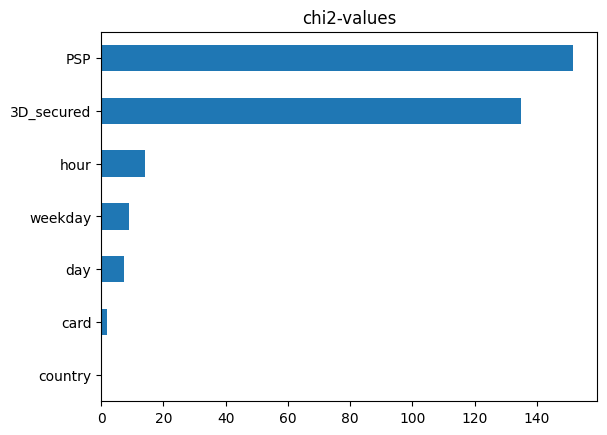

In [31]:
## Daten eingrenzen
Datensatz_kat_Var = Datensatz.filter(['tmsp','country','success','PSP','3D_secured','card'], axis=1)
label_encoder = LabelEncoder()
# Features weekday & hour erzeugen
Datensatz_kat_Var['weekday'] = Datensatz_kat_Var.tmsp.dt.day_name()
Datensatz_kat_Var['day'] = Datensatz_kat_Var.tmsp.dt.strftime('%d').astype(int)
Datensatz_kat_Var['hour']  = Datensatz_kat_Var.tmsp.dt.strftime('%H').astype(int)

# Daten in numerische Werte encoden
Datensatz_kat_Var['weekday'] = label_encoder.fit_transform(Datensatz_kat_Var['weekday'])
Datensatz_kat_Var['country'] = label_encoder.fit_transform(Datensatz_kat_Var['country'])
Datensatz_kat_Var['PSP'] = label_encoder.fit_transform(Datensatz_kat_Var['PSP'])
Datensatz_kat_Var['card'] = label_encoder.fit_transform(Datensatz_kat_Var['card'])

from sklearn.feature_selection import chi2

X = Datensatz_kat_Var.filter(['weekday','day','hour','country','PSP','3D_secured','card'], axis=1)
y = Datensatz_kat_Var['success']
chi_scores = chi2(X,y)

chi2_values = pd.Series(chi_scores[0],index = X.columns)
chi2_values.sort_values(ascending = True , inplace = True)
chi2_values.plot.barh(title='chi2-values')

#### Betrachtung der Verteilung der Merkmalsvariablen

In [6]:
#Histogram aller Merkmalsvariablen
fig = px.histogram(Datensatz, x="amount",color='success', title='Verteilung von "amount"')
fig.show()
fig = px.histogram(Datensatz, x="PSP",color='success', title='Verteilung von "PSP"')
fig.show()
fig = px.histogram(Datensatz, x="3D_secured",color='success', title='Verteilung von "3D_secured"')
fig.show()
fig = px.histogram(Datensatz, x="card",color='success', title='Verteilung von "card"')
fig.show()
fig = px.histogram(Datensatz_kat_Var, x="hour",color='success', title='Verteilung von "hour"')
fig.show()
fig = px.histogram(Datensatz, x=Datensatz.tmsp.dt.day_name(),color='success', title='Verteilung von "day"')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

### 2.2 Modellbasierte Merkmalsauswahl
#### RandForest

In [11]:
# Modell-Entwicklung
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

#### Daten aufbereiten & encoden

In [16]:
label_encoder = LabelEncoder()

ML_Daten = Datensatz.filter(['amount','success','PSP','country','card','tmsp','3D_secured'], axis=1)

ML_Daten['country'] = label_encoder.fit_transform(ML_Daten['country'])
ML_Daten['PSP'] = label_encoder.fit_transform(ML_Daten['PSP'])
ML_Daten['card'] = label_encoder.fit_transform(ML_Daten['card'])

# Datumswerte in Tag/ Wochentag/ Stunde aufteilen
ML_Daten['weekday'] = ML_Daten['tmsp'].dt.day_name()
ML_Daten['weekday'] = label_encoder.fit_transform(ML_Daten['weekday'])
ML_Daten['day'] = ML_Daten['tmsp'].dt.strftime('%d').astype(int)
ML_Daten['hour'] = ML_Daten['tmsp'].dt.strftime('%H').astype(int)

##### Daten-Separation als X Merkmale and Zielvariable Y

In [17]:
Y = ML_Daten['success']
X = ML_Daten.drop('success',axis=1)
X = X.drop('tmsp',axis=1)

#Daten-Normalisierung
X_normalized= (X-X.min())/(X.max()-X.min())

#### Aufteilung in Trainings- und Validierungsdatensatz

In [18]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

#### Modell trainieren

In [19]:
rfc = RandomForestClassifier(max_depth = 2)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2)

#### Modell-Bewertung


In [20]:
print(f"Bewertung der Vorhersage-Genauigkeit auf Basis der Trainingsdaten: {rfc.score(x_train, y_train)}")
print(f"Bewertung der Vorhersage-Genauigkeit auf Basis der Testdaten: {rfc.score(x_test, y_test)}")

Bewertung der Vorhersage-Genauigkeit auf Basis der Trainingsdaten: 0.7969896845863916
Bewertung der Vorhersage-Genauigkeit auf Basis der Testdaten: 0.7975600079349335


#### A) Im Model Integrierte Merkmalsgewichtung mit Attribut "feature_importances_"
Häufigkeit der Verwendung des Merkmal in jedem Baum des. Formal wird sie als die (normierte) Gesamtreduktion des Kriteriums durch dieses Merkmal berechnet.

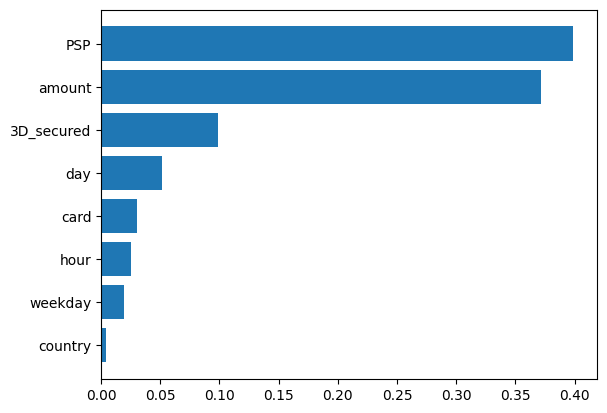

In [32]:
importances = rfc.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

### B) Merkmals-Gewichtung nach Permutation
Technik, mit der die Bedeutung eines Merkmals für ein bestimmtes angepasstes Modell bewertet wird. Im Grunde genommen wird ein Merkmal umgestellt und es wird geprüft, wie das Modell seine Vorhersage ändert. Die Veränderung der Vorhersage entspricht also der Bedeutung des Merkmals.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

rfc = make_pipeline(StandardScaler(),RidgeCV())
rfc.fit(x_train, y_train)

print(f"model score on training data: {rfc.score(x_train, y_train)}")
print(f"model score on testing data: {rfc.score(x_test, y_test)}")

model score on training data: 0.019882545291375453
model score on testing data: 0.013697472812497224


In [ ]:
def get_score_after_permutation(model, X, y, curr_feat):
    """return the score of model when curr_feat is permuted"""

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values
    )

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """compare the score when curr_feat is permuted"""

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

feature_importance_list = pd.DataFrame(columns = ['feature','feature importance'])

for feature in x_train.columns.values:
  curr_feat = feature
  feature_importance = get_feature_importance(rfc, x_train, y_train, curr_feat)
  current_row = pd.DataFrame({'feature':[feature],'feature importance':[feature_importance]})
  feature_importance_list = pd.concat([feature_importance_list, current_row])

In [ ]:
print(feature_importance_list.sort_values(by = 'feature importance', ascending= False))

#Balkendiagramm
fig = px.bar(feature_importance_list.sort_values(by = 'feature importance', ascending= False), x='feature', y='feature importance')
fig.show()